## Comparison of `HeadLineSinkString` and `LeakyLineDoubletString` vs. image well

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ttim

Consider a well pumping in a phreatic aquifer with $S_y=0.1$. The hydraulic conductivity of the aquifer is 10 m/d and the saturated thickness may be approximated as constant and equal to 20 m. The well is located at $(x,y)=(0,0)$. The discharge of the well is 1000 m$^3$/d and the radius is 0.3 m. there is a very long river with a fixed head located along the line $x=50$ m. The head is computed at $(x,y)=(20,0)$ for the first 20 days after the well starts pumping. The solution for an image well is compared to the solution using a `HeadLineSinkString` element of different lengths.

self.neq  2
solution complete


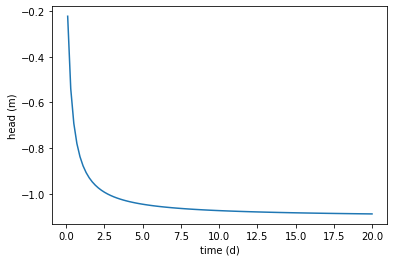

In [2]:
ml1 = ttim.ModelMaq(
    kaq=10, z=[20, 0], Saq=[0.1], phreatictop=True, tmin=0.001, tmax=100
)
w1 = ttim.Well(ml1, 0, 0, rw=0.3, tsandQ=[(0, 1000)])
w2 = ttim.Well(ml1, 100, 0, rw=0.3, tsandQ=[(0, -1000)])
ml1.solve()
t = np.linspace(0.1, 20, 100)
h1 = ml1.head(20, 0, t)
plt.plot(t, h1[0], label="river modeled with image well")
plt.xlabel("time (d)")
plt.ylabel("head (m)")

self.neq  6
solution complete
self.neq  11
solution complete


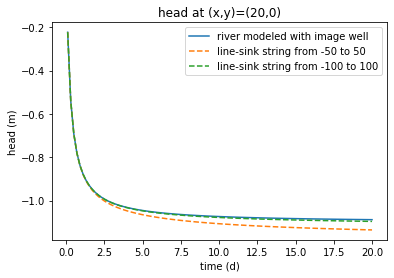

In [3]:
plt.plot(t, h1[0], label="river modeled with image well")
for ystart in [-50, -100]:
    ml2 = ttim.ModelMaq(
        kaq=10, z=[20, 0], Saq=[0.1], phreatictop=True, tmin=0.001, tmax=100
    )
    w = ttim.Well(ml2, 0, 0, rw=0.3, tsandQ=[(0, 1000)])
    yls = np.arange(ystart, -ystart + 1, 20)
    xls = 50 * np.ones(len(yls))
    lss = ttim.HeadLineSinkString(ml2, xy=list(zip(xls, yls)), tsandh="fixed")
    ml2.solve()
    h2 = ml2.head(20, 0, t)
    plt.plot(t, h2[0], "--", label=f"line-sink string from {ystart} to {-ystart}")
plt.title("head at (x,y)=(20,0)")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()

The solution is repeated for the case where there is a long impermeable wall along $x=50$ m rather than a river.

self.neq  2
solution complete


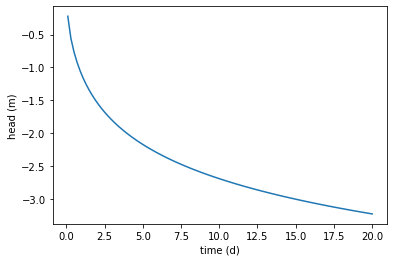

In [4]:
ml1 = ttim.ModelMaq(
    kaq=10, z=[20, 0], Saq=[0.1], phreatictop=True, tmin=0.001, tmax=100
)
w1 = ttim.Well(ml1, 0, 0, rw=0.3, tsandQ=[(0, 1000)])
w2 = ttim.Well(ml1, 100, 0, rw=0.3, tsandQ=[(0, 1000)])
ml1.solve()
t = np.linspace(0.1, 20, 100)
h1 = ml1.head(20, 0, t)
plt.plot(t, h1[0], label="impermeable wall modeled with image well")
plt.xlabel("time (d)")
plt.ylabel("head (m)")

self.neq  11
solution complete
self.neq  21
solution complete
self.neq  41
solution complete


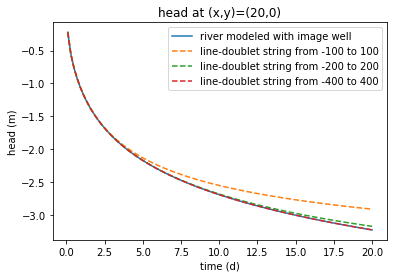

In [5]:
plt.plot(t, h1[0], label="river modeled with image well")
for ystart in [-100, -200, -400]:
    ml2 = ttim.ModelMaq(
        kaq=10, z=[20, 0], Saq=[0.1], phreatictop=True, tmin=0.001, tmax=100
    )
    w = ttim.Well(ml2, 0, 0, rw=0.3, tsandQ=[(0, 1000)])
    yls = np.arange(ystart, -ystart + 1, 20)
    xls = 50 * np.ones(len(yls))
    lss = ttim.LeakyLineDoubletString(ml2, xy=list(zip(xls, yls)), res="imp")
    ml2.solve()
    h2 = ml2.head(20, 0, t)
    plt.plot(t, h2[0], "--", label=f"line-doublet string from {ystart} to {-ystart}")
plt.title("head at (x,y)=(20,0)")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()